## Train a  Bernoulli-Bernoulli RBM (BBRBM) to fit XOR calculations

In [1]:
import numpy as np
import timeit
from tfrbm.bbrbm import BBRBM
import matplotlib.pyplot as plt

import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [2]:
bm = BBRBM(n_visible=9,n_hidden= 61)

### dataset[i][0] xor dataset[i][1] = dataset[i][2]

In [3]:
f = open("/Users/shitian.ni/dwave/CFQIRBM/3x3.txt")
dataset = np.array([[int(data) for data in f.read() if data in "01"]])

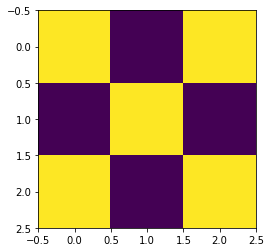

In [4]:
plt.figure()
plt.imshow(dataset[0].reshape(3, -1))

In [5]:
err = bm.fit(dataset,n_epoches=10)

In [6]:
sample = bm.reconstruct(np.zeros(shape=[1,9]))[0]>=0.5

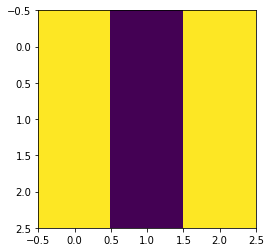

In [7]:
plt.figure()
plt.imshow(sample.reshape(3, -1))

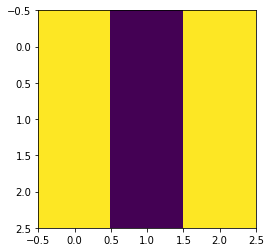

In [8]:
err = bm.fit(dataset,n_epoches=10)
sample = bm.reconstruct(np.zeros(shape=[1,9]))[0]>=0.5
plt.figure()
plt.imshow(sample.reshape(3, -1))

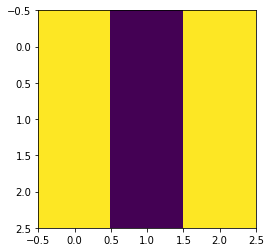

In [9]:
err = bm.fit(dataset,n_epoches=10)
sample = bm.reconstruct(np.zeros(shape=[1,9]))[0]>=0.5
plt.figure()
plt.imshow(sample.reshape(3, -1))

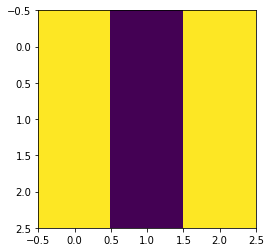

In [10]:
err = bm.fit(dataset,n_epoches=10)
sample = bm.reconstruct(np.zeros(shape=[1,9]))[0]>=0.5
plt.figure()
plt.imshow(sample.reshape(3, -1))

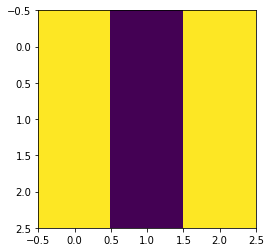

In [11]:
err = bm.fit(dataset,n_epoches=10)
sample = bm.reconstruct(np.zeros(shape=[1,9]))[0]>=0.5
plt.figure()
plt.imshow(sample.reshape(3, -1))

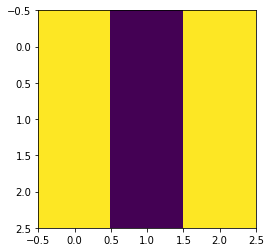

In [12]:
err = bm.fit(dataset,n_epoches=30)
sample = bm.reconstruct(np.zeros(shape=[1,9]))[0]>=0.5
plt.figure()
plt.imshow(sample.reshape(3, -1))

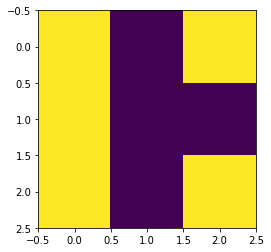

In [13]:
err = bm.fit(dataset,n_epoches=10)
sample = bm.reconstruct(np.zeros(shape=[1,9]))[0]>=0.5
plt.figure()
plt.imshow(sample.reshape(3, -1))

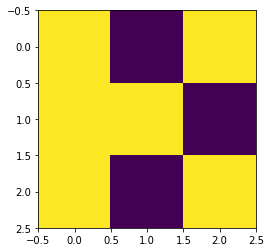

In [14]:
err = bm.fit(dataset,n_epoches=20)
sample = bm.reconstruct(np.zeros(shape=[1,9]))[0]>=0.5
plt.figure()
plt.imshow(sample.reshape(3, -1))

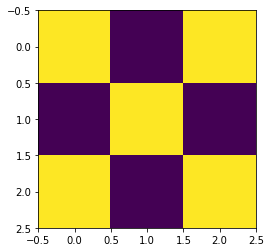

In [15]:
err = bm.fit(dataset,n_epoches=1)
sample = bm.reconstruct(np.zeros(shape=[1,9]))[0]>=0.5
plt.figure()
plt.imshow(sample.reshape(3, -1))

### 111 epochs